# Python en Finanzas - Trabajo Final

Ejercicio - 
Asumamos que trabajamos en el área de finanzas de una empresa y estamos preparando la reunión mensual.

La empresa tiene en la cartera de inversiones un bono que vence dentro de exactamente 6 años con cupón semestral del 6.875% amortizable al vencimiento con VN 100. Nos ofrecen un Tender (oferta de recompra del bono) pero no nos informaron a qué precio se ejecutaría el Tender en caso de aceptar. Nos van a dar esa información en la misma reunión. Además la empresa va a recibir un flujo de dinero. 

Debemos calcular el precio teórico del bono y su duration. Si el precio teórico es menor que el ofertado para entrar en el Tender aceptaremos, de lo contrario nos quedaremos con el bono.

En el caso en que sea conveniente aceptar el Tender, con el dinero recibido por la venta del bono se quiere invertir en una cartera compuesta por los siguientes activos: S&P 500 (^GSPC), NASDAQ 100 (^NDX), Russell 2000 Value (^RUT), iShares MSCI Emerging Markets ETF (EEM), Vanguard Total International Bond Index Fund ETF Shares (BNDX) con un nivel de volatilidad de 11% y las siguientes restricciones:


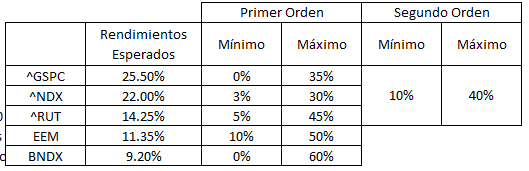

Deseamos conocer los pesos correspondientes a cada índice /ETF que conforman el portfolio óptimo. Calcular los mismo y graficar los retornos de los índices y los histogramas.

En el caso en que no convenga aceptar el Tender, con el ingreso de dinero se desean comprar dos acciones entre cuatro opciones disponibles: The Walt Disney Company (DIS) , AT&T (T), Pfizer Inc. (PFE), Walmart Inc (WMT). Calcular el ratio de Treynor considerando para el cálculo del beta el modelo CAPM y teniendo en cuenta sólo éste ratio recomendar qué acciones comprar. Realizar los gráficos de los retornos y los histogramas de los mismos. Para las dos acciones seleccionadas calcular el Sharpe Ratio.


Objetivo: Armar una función en donde ingresemos el precio del Tender y nos de como resultado:
los pesos del portfolio óptimo en caso de que sea conveniente vender el bono, junto a los gráficos de retornos y los histogramas de los índices; de lo contrario, las acciones que debemos comprar con el ingreso de dinero, el gráfico de retornos y el histograma y el sharpe ratio de ambas acciones en caso de que no sea conveniente aceptar en el Tender.

Datos necesarios para realizar los cáculos:

Tasa de descuento= 2.05% anual.

Para el cálculo del portfolio óptimo y para el cálculo de los ratios tomar datos diarios desde el 01-09-2018 al 01-09-2021. 

Tasa libre de riesgo constante = 1.45% anual




In [1]:
import numpy as np
from scipy.optimize import minimize
import pandas_datareader.data as data
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as pl
import operator

#### Pseudocódigo: Pensar la estructura antes de comenzar el código.

Inicio

n <- Cantidad de cupones

VN <- 100 #Valor Nominal

i <- 0.06875 #Interes semestral

d <- 0.0205/2 #Tasa de descuento semestral

C <- [100*0.06875,100*0.06875,100*0.06875,100*0.06875,100*0.06875,100*0.06875+100] #Cupones semestrales

##### El calculo del Valor Técnico

C_desc <-- c / ((1+d) ** n) Para n <-- 1 hasta n <= 6 #Cupones descontados

#Iniciamos la suma

suma <-- 0

Para cupon en P:

suma <-- suma + cupon
VT <-- P + VN / ((1+d) ** n)

##### Calculo Duración Mauclay

producto <-- n*C_desc #Multiplicamos el valor actual del 𝑖− ésimo pago de un bono por el tiempo que transcurre hasta el momento del 𝑖− ésimo pago

#Iniciamos el cálculo de la Duración Mouclay

Duracion_Macaulay <-- 0

Para cupon en producto:

Duracion_Macaulay <-- (Duracion_Macaulay + cupon) / V
Fin Para


#Pseudocódigo

Para un desvío objetivo

var_o=0.11

SPX <- DataReader from Yahoo, start='2018-09-01' end='2021-09-01'

NASDAQ <- DataReader from Yahoo, start='2018-09-01' end='2021-09-01'

RUSSELL <- DataReader from Yahoo, start='2018-09-01' end='2021-09-01'

MSCI_EMERG <- DataReader from Yahoo, start='2018-09-01' end='2021-09-01'

BNDX <- DataReader from Yahoo, start='2018-09-01' end='2021-09-01'

#Definimos la función para calcular los rendimientos diarios

Inicio

Rendimientos <- Activo[t] / Activo[t-1] - 1

Fin

#Calcular el portfolio óptimo

Dado un desvío objetivo var_o=0.11

El portfolio que maximiza la Rentabilidad (Rp):

Rp = -min Rp - (wSPX*25.5%, wNASDAQ*22%, wRUSSELL*14.25%, wMSCI_EMERG*11.35%, wBNDX*9.2%)

Sujeto a:

    wSPX+wNASDAQ+wRUSSELL+wMSCI_EMERG+wBNDX-1=0
    
    var - var_o = 0  #Desvío del portfolio menos Desvío objetivo del portfolio
    
    0%<= wSPX =< 35%
    
    3%<= wNASDAQ =< 30%
    
    5%<= wRUSSELL =< 45%
    
    10%<= wMSCI_EMERG =< 50%
    
    0%<= wBNDX =< 60%
    
    wSPX + wNASDAQ + wRUSSELL + wMSCI_EMERG - 10% >= 0
    
    -wSPX - wNASDAQ - wRUSSELL - wMSCI_EMERG + 40% >= 0

El valor teórico del Bono es: $ 127.11003364269587

La Duración Macaulay del Bono es= 10.291648141832951

El precio del Tender ofrecido es= $126

Rechazar el Tender

En este caso, con el ingreso de dinero se prodece a comprar dos acciones entre cuatro opciones disponibles: The Walt Disney Company (DIS) , AT&T (T), Pfizer Inc. (PFE), Walmart Inc (WMT).


Si tenemos solamente en cuenta el Ratio Treynor, las 2 acciones que se recomiendan comprar con el ingreso de dinero son: [('Disney (DIS)', 0.0008883506464577652), ('Walmart Inc (WMT)', 0.0013534682105220536)]

Gráfico de los retornos y los histogramas de las acciones recomendadas
Acción recomendada 1 (utilizar el símbolo de Yahoo Finance)= DIS
Acción recomendada 2 (utilizar el símbolo de Yahoo Finance)= WMT


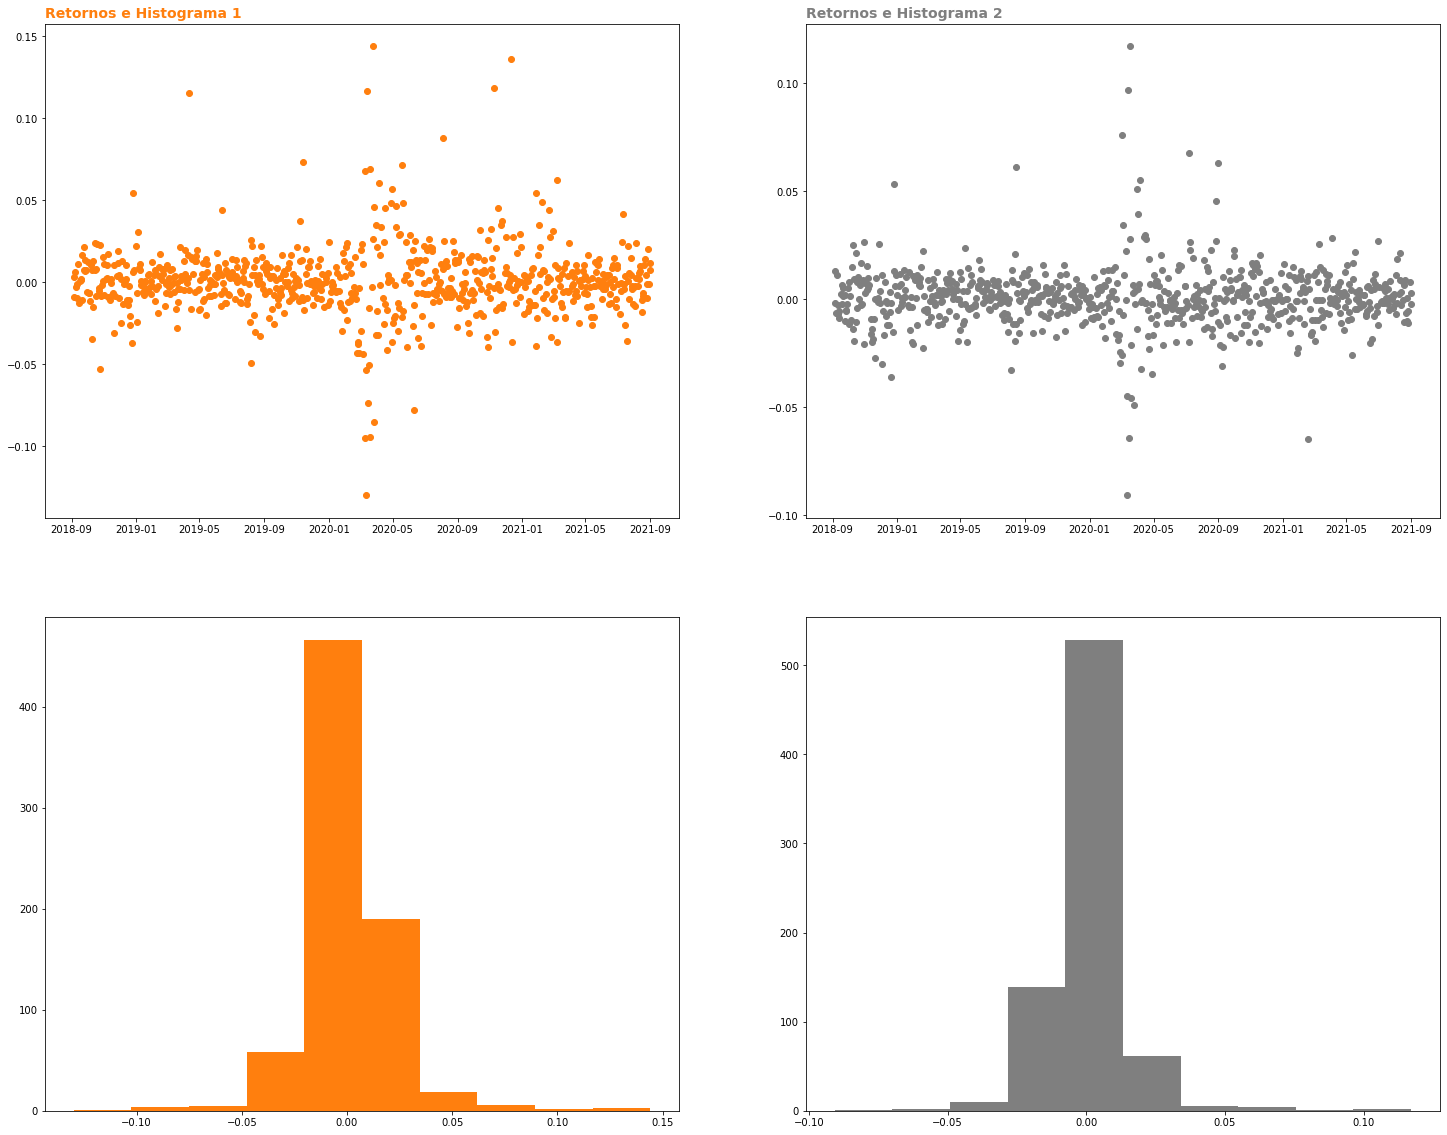

El Ratio Sharpe correspondiente a DIS es= 0.04104453835194108

El Ratio Sharpe correspondiente a WMT es= 0.04993595735809293


In [3]:
#Calculo del precio teórico del bono

n=[n+1 for n in range(12)] #Cantidad de cupones
VN=100 #Valor Nominal
i=0.034375 #Tasa de interés semestral
d=0.0205/2

C=[None]*len(n)

for indice in range(len(n)):
    C[indice]= VN*i               #Flujos del bono
    
C[len(n)-1]=C[len(n)-1]+VN

C_desc=[None]*len(n)

for indice in range(len(n)):
    C_desc[indice]= C[indice]/((1+d)**(n[indice]))    #Flujos descontados del bono

VT=0

for cupon in C_desc:
    VT= VT + cupon

print('El valor teórico del Bono es: $',VT)

producto = [x*y for x,y in zip(C_desc,n)]

#Inicio
Duracion_Macaulay=0
for cupon in producto:
    Duracion_Macaulay=(Duracion_Macaulay+cupon)
    
Duracion_Macaulay=Duracion_Macaulay/VT
    
print('')
print('La Duración Macaulay del Bono es=',Duracion_Macaulay)
print('')

Tender=int(input("El precio del Tender ofrecido es= $"))

#Definición del cálculo del portfolio óptimo de índices

def portfolio_optimo():
    inicio='2018-09-01'
    fin='2021-09-01'
    
    SPX= data.DataReader('^GSPC',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    NASDAQ= data.DataReader('^NDX',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    RUSSELL= data.DataReader('^RUT',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    MSCI_EMERG= data.DataReader('EEM',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    BNDX= data.DataReader('BNDX',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    
    def Rendimientos(Activo):
        rendimiento=[]
        for j in range(1,len(Activo)):
            rendimiento.append(Activo[j]/Activo[j-1]-1)
        return rendimiento
    
    #Calculamos los rendimientos
    RendSPX=Rendimientos(SPX)
    RendNASDAQ=Rendimientos(NASDAQ)
    RendRUSSELL=Rendimientos(RUSSELL)
    RendMSCI_EMERG=Rendimientos(MSCI_EMERG)
    RendBNDX=Rendimientos(BNDX)
    
    def Objetivo(w):
        r=[0.255,0.22,0.1425,0.1135,0.092]
        w=np.array(w)
        r=np.array(r)
        return -(r@w)
    
    def Restriccion1(w):
        sum_sq=1
        for i in range(len(w)):
            sum_sq=sum_sq-w[i]
        return sum_sq
        
    #Restriccion de igualdad
    rest1={'type':'eq','fun':Restriccion1}  #Con esta línea lo que hago es que la función Restriccion1 sea igual a 0
    
    #Matriz de retornos diarios
    MatrizRendimientos=[RendSPX,RendNASDAQ,RendRUSSELL,RendMSCI_EMERG,RendBNDX]
    
    #Matriz de varianzas-covarianzas
    C=np.cov(MatrizRendimientos)
    C=np.matrix(C)  #Necesito que tenga la estructura de una estructura de matriz de numpy para poder operar en el futuro
    
    def Restriccion2(w):
        w=np.array(w)[np.newaxis] #np.newaxis porque necesito tener primero un vector fila
        var=np.sqrt(w*C*w.T*252)
        var_o=0.11
        S = var - var_o
        return float(S)
    
    #Restriccion de igualdad 2
    rest2={'type':'eq','fun':Restriccion2}  #Con esta línea lo que hago es que la función Restriccion2 sea igual a 0
    
    def Restriccion3(w):
        return w[0]+w[1]+w[2]+w[3]-0.1
    
    rest3={'type':'ineq','fun':Restriccion3}  #Con esta línea lo que hago es que la función Restriccion3 sea mayor a 0
    
    def Restriccion4(w):
        return -w[0]-w[1]-w[2]-w[3]+0.4
    
    rest4={'type':'ineq','fun':Restriccion4}  #Con esta línea lo que hago es que la función Restriccion4 sea mayor a 0
    
    Restricciones=[rest1,rest2,rest3,rest4]
    
    #Definimos los pesos máximos y minimos de cada activo
    b1=(0.00,0.35)
    b2=(0.03,0.30)
    b3=(0.05,0.45)
    b4=(0.10,0.50)
    b5=(0.00,0.60)
    bnds=(b1,b2,b3,b4,b5)
    
    #Punto inicial
    w0=(0.0,0.0,0.0,0.0,0.0)
    
    #Planteo
    sol=minimize(Objetivo,w0,method='SLSQP',bounds=bnds,constraints=Restricciones)
    
    Retorno_Port_opt=-1*sol.fun
    wSPX=sol.x[0]*100
    wNASDAQ=sol.x[1]*100
    wRUSSELL=sol.x[2]*100
    wMSCI_EMERG=sol.x[3]*100
    wBNDX=sol.x[4]*100
    
      
    print('Cartera de Índices, con un nivel de volatilidad del 11%, compuesta por:')
    print('')
    print('Acciones del índice S&P 500 (GSPC)=',wSPX,'%')
    print('Acciones del índice NASDAQ 100 (NDX)=',wNASDAQ,'%')
    print('Acciones del índice Russell 2000 Value (RUT)=',wRUSSELL,'%')
    print('Acciones del índice iShares MSCI Emerging Markets ETF (EEM)=',wMSCI_EMERG,'%')
    print('Acciones del índice Vanguard Total International Bond Index Fund ETF Shares (BNDX)=',wBNDX,'%')
    
    Cartera=[wSPX,wNASDAQ,wRUSSELL,wMSCI_EMERG,wBNDX]
    nombres=['GSPC','NDX','RUT','EEM','BNDX']    

    pl.pie(Cartera, labels=nombres,autopct="%0.1f %%")
    pl.show()
    
    print('')
    print('El retorno de este portfolio óptimo es:',Retorno_Port_opt*100, '%')
    
    fig, ax = pl.subplots(2, 5,figsize=[45,15])
    ax[0, 0].scatter(SPX.pct_change().dropna().index,SPX.pct_change().dropna(), color='tab:orange')
    ax[0, 1].scatter(NASDAQ.pct_change().dropna().index,NASDAQ.pct_change().dropna(), color='tab:grey',marker='o')
    ax[0, 2].scatter(RUSSELL.pct_change().dropna().index,RUSSELL.pct_change().dropna(), color='tab:green')
    ax[0, 3].scatter(MSCI_EMERG.pct_change().dropna().index,MSCI_EMERG.pct_change().dropna(), color='tab:red')
    ax[0, 4].scatter(BNDX.pct_change().dropna().index,BNDX.pct_change().dropna(), color='tab:purple')
    ax[1, 0].hist(RendSPX, color='tab:orange')
    ax[1, 1].hist(RendNASDAQ, color='tab:grey')
    ax[1, 2].hist(RendRUSSELL, color='tab:green')
    ax[1, 3].hist(RendMSCI_EMERG, color='tab:red')
    ax[1, 4].hist(RendBNDX, color='tab:purple')
    ax[0][0].set_title('Retornos e Histograma del S&P 500', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:orange'})
    ax[0][1].set_title('Retornos e Histograma del NASDAQ', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:grey'})
    ax[0][2].set_title('Retornos e Histograma del Russell 2000 Value', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:green'})
    ax[0][3].set_title('Retornos e Histograma del iShares MSCI Emerging Markets', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:red'})
    ax[0][4].set_title('Retornos e Histograma del Vanguard Tot Int Bond Index Fund', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
    pl.show()

    
#Funcion para elegir en qué acciones invertir

def Eleccion_acciones():
    
    inicio='2018-09-01'
    fin='2021-09-01'
    
    Rf=0.0145/365 #retorno promedio del activo
    
    SPX= data.DataReader('^GSPC',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    DIS= data.DataReader('DIS',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    T= data.DataReader('T',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    PFE= data.DataReader('PFE',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    WMT= data.DataReader('WMT',start=inicio,end=fin,data_source='yahoo')['Adj Close']
    
    def Rendimientos(Activo):
        rendimiento=[]
        for j in range(1,len(Activo)):
            rendimiento.append(Activo[j]/Activo[j-1]-1)
        return rendimiento
    
    def Rendimiestos_Rf(Activo1):
        rendimiento_rf=[]
        for j in range(len(Activo1)):
            rendimiento_rf.append(Activo1[j]-Rf)
        return rendimiento_rf
    
    #Calculamos los rendimientos
    Rend_SPX=Rendimientos(SPX)
    Rend_DIS=Rendimientos(DIS)
    Rend_T=Rendimientos(T)
    Rend_PFE=Rendimientos(PFE)
    Rend_WMT=Rendimientos(WMT)
    
    #Calculamos los rendimientos menos la risk free
    Rend_SPX_rf=Rendimiestos_Rf(Rend_SPX)
    Rend_DIS_rf=Rendimiestos_Rf(Rend_DIS)
    Rend_T_rf=Rendimiestos_Rf(Rend_T)
    Rend_PFE_rf=Rendimiestos_Rf(Rend_PFE)
    Rend_WMT_rf=Rendimiestos_Rf(Rend_WMT)
    
    #Calculamos los retornos diarios promedios
    AVG_RendDIS=sum(Rend_DIS)/len(Rend_DIS)
    AVG_RendT=sum(Rend_T)/len(Rend_T)
    AVG_RendPFE=sum(Rend_PFE)/len(Rend_PFE)
    AVG_RendWMT=sum(Rend_WMT)/len(Rend_WMT)
    
    #Definimos la fórmula para el cálculo del Beta
    
    def Beta(Activo_rend):
        y=Activo_rend #Variable dependiente
        x=Rend_SPX_rf
        x=sm.add_constant(x)
        resultado=sm.OLS(y,x).fit() #Hacemos la regresión
        beta=resultado.params[1]
        return beta
    
    #Calculamos el Beta de cada acción
    
    Beta_DIS=Beta(Rend_DIS_rf)
    Beta_T=Beta(Rend_T_rf)
    Beta_PFE=Beta(Rend_PFE_rf)
    Beta_WMT=Beta(Rend_WMT_rf)
    
    #Calculamos el Ratio Treynor
    
    Treynor_DIS=(AVG_RendDIS-Rf)/Beta_DIS
    Treynor_T=(AVG_RendT-Rf)/Beta_T
    Treynor_PFE=(AVG_RendPFE-Rf)/Beta_PFE
    Treynor_WMT=(AVG_RendWMT-Rf)/Beta_WMT       
    
    Treynor={
        'Disney (DIS)':Treynor_DIS,
        'AT&T (T)':Treynor_T,
        'Pfizer Inc. (PFE)':Treynor_PFE,
        'Walmart Inc (WMT)':Treynor_WMT
    }
    
    Treynor=sorted(Treynor.items(),key=operator.itemgetter(1))
    
    print('')
    print('Si tenemos solamente en cuenta el Ratio Treynor, las 2 acciones que se recomiendan comprar con el ingreso de dinero son:',
          Treynor[-2:])
    
    print('')
    
    print('Gráfico de los retornos y los histogramas de las acciones recomendadas')
    
    accion1=input('Acción recomendada 1 (utilizar el símbolo de Yahoo Finance)= ')
    accion2=input('Acción recomendada 2 (utilizar el símbolo de Yahoo Finance)= ')
    
    def Grafico(a):
        accion=a
        if accion=='DIS':
            accion=DIS
        elif accion=='T':
            accion=T
        elif accion=='PFA':
            accion=PFE
        else:
            accion=WMT            
            
        return accion
    
    def Grafico_rend(b):
        accion=b
        if accion=='DIS':
            accion=Rend_DIS
        elif accion=='T':
            accion=Rend_T
        elif accion=='PFA':
            accion=Rend_PFE
        else:
            accion=Rend_WMT
            
        return accion
    
    #Traemos los rendimientos de las acciones elegidas para graficar los retornos y el histograma
    
    Acc1= Grafico(accion1)
    Acc2= Grafico(accion2)
    
    Rend1= Grafico_rend(accion1)
    Rend2= Grafico_rend(accion2)
      
    
    fig, ax = pl.subplots(2, 2,figsize=[25,20])
    ax[0, 0].scatter(Acc1.pct_change().dropna().index,Acc1.pct_change().dropna(), color='tab:orange')
    ax[0, 1].scatter(Acc2.pct_change().dropna().index,Acc2.pct_change().dropna(), color='tab:grey')  
    
    ax[1, 0].hist(Rend1, color='tab:orange')
    ax[1, 1].hist(Rend2, color='tab:grey')    
    ax[0][0].set_title('Retornos e Histograma 1', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:orange'})
    ax[0][1].set_title('Retornos e Histograma 2', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:grey'})
    pl.show()
    
    #Calculamos el Ratio Sharpe de las acciones elgidas
    
    AVGRend_Acc1= sum(Rend1)/len(Rend1)
    AVGRend_Acc2= sum(Rend2)/len(Rend2)
    
    def Varianza(activo):
        suma=0
        for i in activo:
            suma=suma+(i-Rf)**2
        var=suma/len(activo)
        return var
    
    #Calculo de la varianza de cada activo
    
    var_activo1=Varianza(Rend1)
    var_activo2=Varianza(Rend2)
    
    #Calculo del Ratio Sharpe de cada activo
    
    Sharpe_actv1=(AVGRend_Acc1-Rf)/math.sqrt(var_activo1)
    Sharpe_actv2=(AVGRend_Acc2-Rf)/math.sqrt(var_activo2)
    
    print('El Ratio Sharpe correspondiente a',accion1,'es=',Sharpe_actv1)
    print('')
    print('El Ratio Sharpe correspondiente a',accion2,'es=',Sharpe_actv2)
    
    
        
#Árbol de decisión

if Tender > VT:
    print('')
    print('Se procede a aceptar el Tender')
    print('')
    print('Al dinero recibido por el Tender se propone invertirlo de la siguiente manera:')
    print('')
    portfolio_optimo()
else:
    print('')
    print('Rechazar el Tender')
    print('')
    print('En este caso, con el ingreso de dinero se prodece a comprar dos acciones entre cuatro opciones disponibles: The Walt Disney Company (DIS) , AT&T (T), Pfizer Inc. (PFE), Walmart Inc (WMT).')
    print('')
    Eleccion_acciones()
    